# Pendahuluan

Di dalam material ini, kamu akan mempelajari Hyperparameter dan belajar bagaimana ia dapat digunakan untuk menyelesaikan proses penyesuaian model. Lakukan kode dan jalankan setiap sel. Selama proses pembelajaran, kamu akan menemui beberapa blok **TODO** -- ikuti petunjuk untuk mengisinya sebelum menjalankan sel-sel tersebut dan melanjutkan.

## Memahami Konsep Hyperparameter

Disini kamu akan melakukan pengalian informasi dari hyperparameter seperti apa. Terlebih dahulu kita memahami dataset yang kita gunakan sebagai berikut.

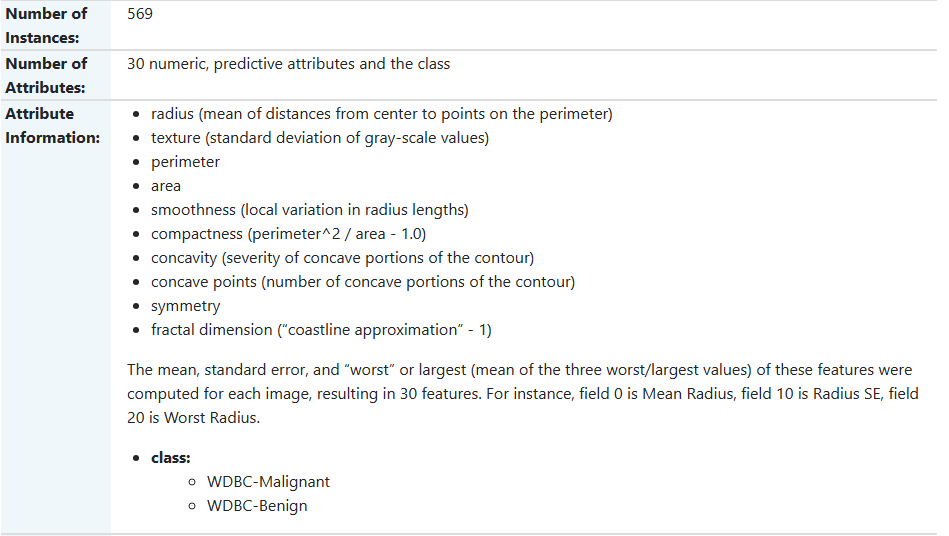

In [44]:
# Siapkan data yang digunakan dan library
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Menyiapkan data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Scaling data X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Memisahkan data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, 
                                                    random_state=42) 

Setelah kamu menyiapkan data. Silahkan melakukan pengalian informasi parameter yang digunakan.

In [ ]:
'''TODO: Mengetahui Parameter'''
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.#TODO)

In [ ]:
'''TODO: Mengetahui Params Detail'''
log_reg = LogisticRegression(penalty = 'lasso')
log_reg.#TODO

In [ ]:
'''TODO: Membuat Automated Hyperparameter Dengan Perbedaan Solver'''
solver = ['lbfgs', 'liblinear', 'liblinear', 'sag', 'saga']
accuracy = []
for i in #TODO:
    model = LogisticRegression(solver = i)
    logreg = model.fit(X_train, y_train)
    pred = logreg.predict(X_test)
    acc = accuracy_score(y_test, pred)
    accuracy.append(acc)

In [ ]:
'''TODO: Membuat Perbedaan Solver dengan Accuracy'''
# Menampilkan hasil perbedaan
plt.plot(#TODO)
plt.gca().set(xlabel = 'solver', ylabel = 'accuracy', title = 'Solver vs Accuracy')
plt.show() 

## GridSearch

Mencoba value parameter dalam algoritma dari hyperparameter yang kita gunakan dan menemukan mana yang terbaik untuk dipilih.


In [ ]:
'''TODO: Menghitung F1 Score'''
# Membangun pipeline proses
pipe = Pipeline(
    steps=[("preprocessor", scaler), 
           ("model", LogisticRegression())]
)

# Menyesuaikan ke data 
pipe.fit(X_train,y_train)

# Evaluasi model
y_pred = pipe.predict(X_test)
print(f1_score(#TODO))

Kita akan fokus ke tiga parameter dibawah:
1. C (Cost Parameter): mengontrol penalti terhadap kesalahan klasifikasi pada data training. Semakin besar nilai C, semakin ketatnya model terhadap data training, yang dapat menyebabkan overfitting. Sebaliknya, semakin kecil nilai C, semakin besar toleransinya terhadap data training yang keliru klasifikasinya, yang dapat menyebabkan underfitting. Oleh karena itu, kita ingin mencari nilai C yang optimal agar model dapat menggeneralisasi dengan baik pada data baru.
2. solver: parameter yang digunakan untuk menentukan metode yang digunakan dalam menyelesaikan masalah optimisasi yang mendasari regresi logistik. Masalah optimisasi ini berfokus pada mencari nilai optimal dari parameter model (koefisien) yang paling sesuai dengan data training.
3. max_iter: menentukan jumlah iterasi maksimum yang akan dilakukan oleh algoritma optimisasi untuk mencapai konvergensi. Algoritma optimisasi akan terus melakukan iterasi hingga mencapai konvergensi (yaitu nilai koefisien yang optimal) atau mencapai batas iterasi maksimum yang ditentukan oleh max_iter.

In [ ]:
'''TODO: Gunakan GridSearch untuk memperbaiki proses'''
%timeit max(range(100000))
hyperparameter_space = { 
"model__C": #TODO, 
"model__solver": #TODO, 
"model__max_iter": #TODO,
} 

# Inisiasi Gridsearch
clf = GridSearchCV(pipe, hyperparameter_space, 
                   scoring = 'accuracy', cv=5, 
                   n_jobs=-1, refit = True,
                   verbose=2)

# Jalankan Gridsearch
clf.fit(X_train, y_train)

In [ ]:
# Tampilkan data terbaik
clf.best_params_, clf.best_score_

In [ ]:
# Tampilkan score
clf.score(X_test,y_test)

## RandomizedSearch

Ini masih sama dengan GridSearch, kita masih mendefine parameter, maupun estimator. Hanya yang membedakan adalah pengambilan grid secara random


In [ ]:
'''TODO: Menghitung F1 Score'''
# Membangun pipeline proses
pipe = Pipeline(
    steps=[("preprocessor", scaler), 
           ("model", LogisticRegression())]
)

# Menyesuaikan ke data 
pipe.fit(X_train,y_train)

# Evaluasi model
y_pred = pipe.predict(X_test)
print(f1_score(#TODO))

Kita akan fokus ke tiga parameter dibawah:
1. C (Cost Parameter): mengontrol penalti terhadap kesalahan klasifikasi pada data training. Semakin besar nilai C, semakin ketatnya model terhadap data training, yang dapat menyebabkan overfitting. Sebaliknya, semakin kecil nilai C, semakin besar toleransinya terhadap data training yang keliru klasifikasinya, yang dapat menyebabkan underfitting. Oleh karena itu, kita ingin mencari nilai C yang optimal agar model dapat menggeneralisasi dengan baik pada data baru.
2. solver: parameter yang digunakan untuk menentukan metode yang digunakan dalam menyelesaikan masalah optimisasi yang mendasari regresi logistik. Masalah optimisasi ini berfokus pada mencari nilai optimal dari parameter model (koefisien) yang paling sesuai dengan data training.
3. max_iter: menentukan jumlah iterasi maksimum yang akan dilakukan oleh algoritma optimisasi untuk mencapai konvergensi. Algoritma optimisasi akan terus melakukan iterasi hingga mencapai konvergensi (yaitu nilai koefisien yang optimal) atau mencapai batas iterasi maksimum yang ditentukan oleh max_iter.

In [ ]:
'''TODO: Gunakan RandomizedSearchCV untuk memperbaiki proses'''
%timeit max(range(100000))
hyperparameter_space = { 
"model__C": #TODO, 
"model__solver": #TODO, 
"model__max_iter": #TODO,
} 

# Inisiasi RandomizedSearchCV
clf = RandomizedSearchCV(pipe, hyperparameter_space, 
                   n_iter = 200, random_state=0,
                   scoring = 'accuracy', cv=5, 
                   n_jobs=-1, refit = True,
                   verbose=2)

# Jalankan RandomizedSearchCV
clf.fit(X_train, y_train)

In [ ]:
# Tampilkan data terbaik
clf.best_params_, clf.best_score_

In [ ]:
# Tampilkan score
clf.score(X_test,y_test)

## Implementasi Data Iris

Pada tutorial ini, kita akan mempelajari tentang hyperparameter tuning menggunakan Grid Search untuk meningkatkan performa model Support Vector Machine (SVM) pada dataset Iris. Kita akan membahas langkah-langkah dari mulai memuat dataset hingga mengevaluasi model yang telah di-tune.

1. Memuat Dataset Iris
2. Pra-pemrosesan Data
3. Membagi Data menjadi Data Training dan Data Testing
4. Membangun Model SVM
5. Definisi Grid Parameter untuk Hyperparameter Tuning
6. Melakukan Hyperparameter Tuning Menggunakan GridSearchCV
7. Memilih Model Terbaik dan Parameter Terbaik

**Langkah 1: Memuat Dataset Iris**

Pertama, kita akan memuat dataset Iris dari scikit-learn menggunakan modul load_iris. Dataset ini akan berisi fitur-fitur (X) dan label kelas (y) yang akan digunakan dalam pelatihan dan evaluasi model.

In [57]:
from sklearn.datasets import load_iris

# Memuat dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

**Langkah 2: Pra-pemrosesan Data**

Selanjutnya, kita akan melakukan pra-pemrosesan data dengan menggunakan StandardScaler dari scikit-learn untuk menormalkan skala fitur-fitur kita.

In [58]:
from sklearn.preprocessing import StandardScaler

# Pra-pemrosesan data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Langkah 3: Membagi Data menjadi Data Training dan Data Testing**

Kita akan membagi data menjadi data training dan data testing menggunakan train_test_split dari scikit-learn.

In [59]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Langkah 4: Membangun Model SVM**

Selanjutnya, kita akan membangun model Support Vector Machine (SVM) menggunakan SVC dari scikit-learn.

In [60]:
from sklearn.svm import SVC

# Membangun model SVM
model = SVC()

**Langkah 5: Definisi Grid Parameter untuk Hyperparameter Tuning**

Kita akan mendefinisikan grid parameter yang akan di-tune menggunakan Grid Search. Grid parameter ini berisi beberapa kombinasi dari hyperparameter yang akan diuji. Kita akan menggunakan 3 parameter.

1. C (Cost Parameter): mengontrol penalti terhadap kesalahan klasifikasi pada data training. Semakin besar nilai C, semakin ketatnya model SVM terhadap data training, yang dapat menyebabkan overfitting. Sebaliknya, semakin kecil nilai C, semakin besar toleransinya terhadap data training yang keliru klasifikasinya, yang dapat menyebabkan underfitting. Oleh karena itu, kita ingin mencari nilai C yang optimal agar model dapat menggeneralisasi dengan baik pada data baru.
2. gamma: mengontrol seberapa jauh pengaruh suatu data point dalam model SVM. Semakin kecil nilai gamma, maka pengaruh data point akan lebih luas, dan sebaliknya, semakin besar nilai gamma, maka pengaruh data point akan lebih lokal. Pada kernel 'rbf' (radial basis function), gamma menentukan ukuran kernel dan mempengaruhi kompleksitas model. Jika gamma terlalu besar, model dapat menjadi overfitting pada data training.
3. kernel: menentukan jenis fungsi kernel yang digunakan untuk mengubah data input menjadi ruang fitur yang lebih tinggi. SVM dapat menggunakan berbagai jenis kernel seperti 'linear', 'rbf' (radial basis function), 'poly' (polynomial), dan lainnya. Kernel 'linear' digunakan untuk data yang dapat dipisahkan dengan garis lurus, sedangkan kernel 'rbf' lebih fleksibel dan cocok untuk data yang tidak dapat dipisahkan secara linear. Pemilihan jenis kernel yang sesuai dengan karakteristik data akan berpengaruh pada performa model.

In [61]:
'''TODO: Persiapkan param grid'''
from sklearn.model_selection import GridSearchCV

# Definisi grid parameter untuk hyperparameter tuning
param_grid = {'C': #TODO, 
              'gamma': #TODO, 
              'kernel': #TODO}

**Langkah 6: Melakukan Hyperparameter Tuning Menggunakan GridSearchCV**

Kita akan menggunakan GridSearchCV dari scikit-learn untuk melakukan hyperparameter tuning menggunakan Grid Search.

In [ ]:
# Melakukan hyperparameter tuning menggunakan GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

**Langkah 7: Memilih Model Terbaik dan Parameter Terbaik**

Setelah hyperparameter tuning selesai, kita dapat memilih model terbaik dan parameter terbaik dari hasil Grid Search.

In [63]:
'''TODO: Menentukan Parameter Terbaik'''
# Mendapatkan model terbaik dan parameter terbaik
best_model = grid_search.#TODO
best_params = grid_search.#TODO

# Mengevaluasi model terbaik dengan data testing
accuracy = best_model.score(#TODO)

In [ ]:
# Menampilkan hasil evaluasi
print("Best Parameters: ", best_params)
print("Accuracy: ", accuracy)

Copyright © DQlab Academy x Abel Kristanto